Generating charts for New and Returning Editors...


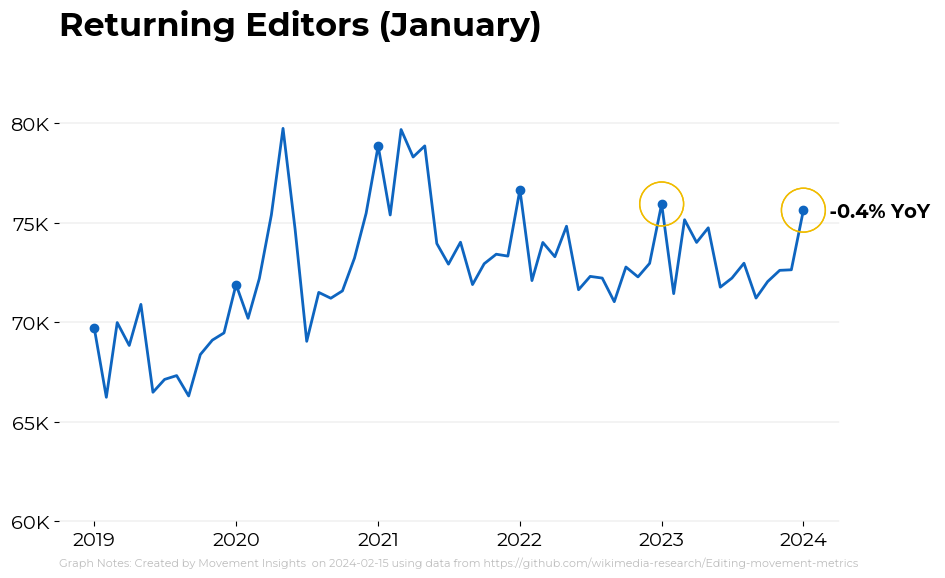

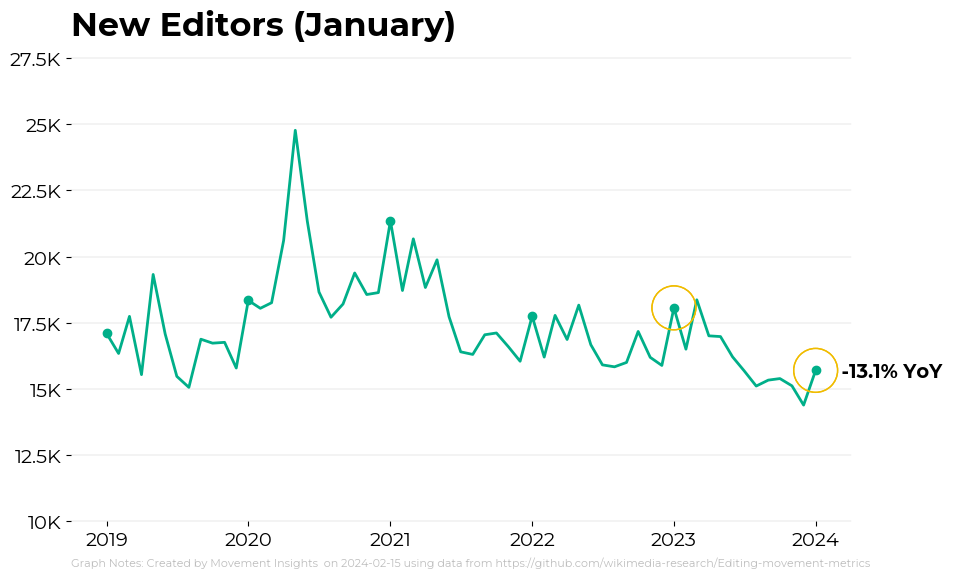

In [8]:
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import os
#local
#from wikicharts import Wikichart, wmf_colors
#jupyter notebook
%run wikicharts.ipynb

def main():
    print("Generating charts for New and Returning Editors...")

    #---PARAMETERS---
    returning_editors_filename = "Returning_Editors.png"
    new_editors_filename = "New_Editors.png"
    # Note for labeling the YoY highlight
    yoy_note = " "
    # Display or note
    display_flag = True

    #---CLEAN DATA---
    df = pd.read_csv(editing_data_path, sep='\t')
 
    start_date = "2019-01-01"
    end_date = datetime.today()
    df['month'] = pd.to_datetime(df['month'])
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]

    colors = {'Returning': wmf_colors['blue'], 'New': wmf_colors['green50']}

    #---MAKE CHART FOR RETURNING EDITORS---
    chart = Wikichart(start_date, end_date, df)
    chart.init_plot(width=12)
    chart.plot_line('month', 'returning_active_editors', colors['Returning'])
    chart.plot_monthlyscatter('month', 'returning_active_editors', colors['Returning'])
    chart.plot_yoy_highlight('month', 'returning_active_editors')
    chart.format(title='Returning Active Editors',
                 radjust=0.75,
                 data_source="https://github.com/wikimedia-research/Editing-movement-metrics")
    
        
    chart.plot_yoy_highlight('month','returning_active_editors')
    chart.annotate(x='month',
        y='returning_active_editors',
        num_annotation=chart.calc_yoy(y='returning_active_editors'))

    
    chart.finalize_plot(returning_editors_filename, display=display_flag)

    #---MAKE CHART FOR NEW EDITORS---
    chart = Wikichart(start_date, end_date, df)
    chart.init_plot(width=12)
    chart.plot_line('month', 'new_active_editors', colors['New'])
    chart.plot_monthlyscatter('month', 'new_active_editors', colors['New'])
    chart.plot_yoy_highlight('month', 'new_active_editors')
    chart.format(title='New Active Editors',
                 radjust=0.75,
                 data_source="https://github.com/wikimedia-research/Editing-movement-metrics")
    
    chart.plot_yoy_highlight('month','new_active_editors')
    chart.annotate(x='month',
        y='new_active_editors',
        num_annotation=chart.calc_yoy(y='new_active_editors'))
    chart.finalize_plot(new_editors_filename, display=display_flag)
    
    
    

if __name__ == "__main__":
    main()